# PRÁTICA GUIADA: Introdução à Regressão Linear.

## 1. Introdução

1.Introdução ao conjunto de dados "bikeshare.csv" 

* Leitura dos dados
* Visualização dos dados

2.Regressão linear
* Forma de regressão linear
* Construção do modelo de regressão linear
* Uso do modelo para previsão
* É importante a escala das features?

3.Trabalho com múltiplas features
* Visualização dos dados (parte 2)
* Acrescentamento de features ao modelo

4.Escolha entre modelos
* Seleção de features
* Métricas de avaliação para problemas de regressão
* Comparação de modelos com sets de treinamento/teste e RMSE
* Comparação de RMSE de teste com RMSE nulo (baseline)
       
5.Criação de features
* Gestão de features categóricas
* Engenharia de features

EXERCÍCIOS
    
6. Comparação da regressão linear com outros modelos

**===========================================================================================**

### 1.1 Importação de dados

Vamos trabalhar com um conjunto de dados sobre aluguéis de bicicletas que foi utilizado em um concurso de Kaggle


São fornecidos dados sobre aluguéis por hora que abrangem dois anos. O conjunto de treinamento abrange os primeiros 19 dias de cada mês e o conjunto de teste vai do dia 20 até o fim do mês. **_Queremos projetar o número total de bicicletas alugadas durante cada hora coberta pelo conjunto do teste, utilizando apenas as informações disponíveis no teste de treinamento._**


**CAMPOS DO SET**

**datetime** - hourly date + timestamp

**season** - 1 = spring, 2 = summer, 3 = fall, 4 = winter

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** - 

1: Clear, Few clouds, Partly cloudy, Partly cloudy <br/>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br/>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds <br/>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total rentals


#### Vamos começar importando a biblioteca Pandas e lendo o arquivo `'bikeshare.csv'` com a função [`.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), observando os parâmetros `index_col = 'datetime'` para usarmos a coluna `'datetime'` como índice do dataframe  e `parse_dates = True` para a análise dos índices.

In [4]:
# Lemos os dados e configuramos o datetime como índice.
import pandas as pd

bikes = pd.read_csv('bikeshare.csv', 
                    index_col = 'datetime', 
                    parse_dates = True)

####  <span style = "color:red">Código Original.</span>
<!---
# Lemos os dados e configuramos o datetime como índice.
import pandas as pd

bikes = pd.read_csv('bikeshare.csv', 
                    index_col = 'datetime', 
                    parse_dates = True)
-->

#### Vamos observar as primeiras linhas dez linahs do dataframe `bikes`. 

In [5]:
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


####  <span style = "color:red">Código Original.</span>
<!---
bikes.head(10)
-->

**Perguntas:**

* O que cada observação representa?
* Qual a variável de resposta (conforme definido por Kaggle)?
* Quantas variáveis há?

#### Vamos renomear a coluna `'count'` com o nome `'total'` e checar novamente as dez primeiras linhas, observe o parâmetro  `inplace = True`, para gravar a modificação.

In [6]:
# Precisamente “count” é um método de Pandas, portanto convém renomear a coluna
bikes.rename(columns = {'count':'total'}, inplace = True)
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


####  <span style = "color:red">Código Original.</span>
<!---
# Precisamente “count” é um método de Pandas, portanto convém renomear a coluna
bikes.rename(columns = {'count':'total'}, inplace = True)
bikes.head(10)
-->

### 1.2 Visualização

#### Uma vez executadas as primeiras alterações, vamos visualizar a relação entre alguns atributos, comecemos por importar as bibliotecas [`seaborn`](https://seaborn.pydata.org/) e [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html). Vamos definir alguns parâmetros globais para o 'matplotlib', como [plt.rcParams](https://matplotlib.org/tutorials/introductory/customizing.html#matplotlib-rcparams), podemos fazer `['figure.figsize'] = (8, 6)` e `['font.size'] = 14`. 

#### Não esqueça de definir a [função mágica](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) [`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) para a geração de plots abaixo das células que os geram.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parâmetros globais para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

####  <span style = "color:red">Código Original.</span>
<!---
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parâmetros globais para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
-->

#### Podemos agora plotar o dataset `bikes` com o auxílio da função [´.plot´](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). Observe o conjunto de parâmetros `kind = 'scatter'`, para uma dispersão enrtre as variáveis `x = 'temp'` e `y = 'total'`, considerando  `alpha = 0.2` para definir a transparência dos pontos.

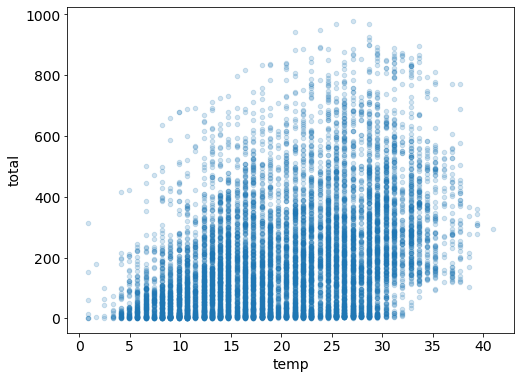

In [8]:
# Plotamos pontos com Pandas
bikes.plot(kind = 'scatter', 
           x = 'temp', 
           y = 'total', 
           alpha = 0.2
          );

####  <span style = "color:red">Código Original.</span>
<!---
# Plotamos pontos com Pandas
bikes.plot(kind = 'scatter', 
           x = 'temp', 
           y = 'total', 
           alpha = 0.2
          );
-->

#### Vamos repetir o gráfico anterior, porém agora aplicando uma regressão implícita, usando o método [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html). Observe os parâmetros 

#### Para os atributos `x = 'temp'` e `y = 'total'`, do conjunto de dados `data = bikes`, com proporção da eixos `aspect = 1.41` e transparência de pontos `scatter_kws = {'alpha': 0.2}`.

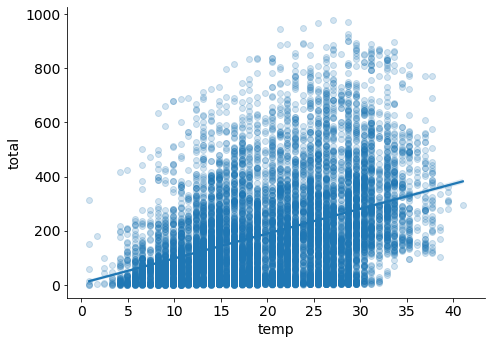

In [9]:
sns.lmplot(x = 'temp', 
           y = 'total', 
           data = bikes, 
           aspect = 1.41, 
           scatter_kws = {'alpha': 0.2}
          );

####  <span style = "color:red">Código Original.</span>
<!---
# Ajuste com Seaborn (modelo linear) 
sns.lmplot(x = 'temp', 
           y = 'total', 
           data = bikes, 
           aspect = 1.41, 
           scatter_kws = {'alpha': 0.2}
          );
--> 

## 2. Revisão: forma do modelo linear

A seguir temos uma relação entre uma variávei dependente 'y' e múltimas variáveis independentes '$x_{i}$', multiplicando os coeficientes angulares $\beta_{i}$ somados ao coeficiente linear $\beta_{0}$, que intercepta o eixo $y_{x=0}$. 

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ é a variável dependente (a resposta)
- $\beta_0$ é o termo de intercepção
- $\beta_1$ é o coeficiente para $x_1$ 
- $\beta_n$ é o coeficiente para $x_n$

![Estimativa de coeficientes coefficients](multiple_linear.png)


#### Os **$\beta$** são os chamados **_Coeficientes do modelo_**

- Esses valores são estimados (ou "aprendidos") no processo de adaptação do modelo utilizando o critério ** mínimos quadrados **.
- Especificamente, encontramos a linha (matematicamente) que minimiza a adição ** de quadrados de resíduos ** (ou “total de erros quadráticos”).
- E quando já tivermos aprendido esses coeficientes, podemos usar o modelo para prever a resposta.


![Estimativa de coeficientes coefficients](linearReg.png)


#### No diagrama anterior:

- Os pontos azuis são os ** valores observados ** de x e y.
- A linha vermelha é nossa ** linha de mínimos quadrados **.
- As linhas tracejadas azuis são os ** resíduos **, que são as distâncias verticais entre os valores observados y a linha de mínimos quadrados.

## 3. Construção do modelo de regressão linear

#### Vamos começar a modelar nossos dados com o atributo `'temp'` de nosso dataframe `bikes`. Vamos criar um objeto `X` para receber a coluna `bikes['temp']` e um objeto `y` para receber a coluna `bikes['total']`.

In [10]:
# Criamos X e y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['total']
#print(X)
#print(y)

####  <span style = "color:red">Código Original.</span>
<!---
# Criamos X e y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['total']
print(X)
print(y)
-->

#### Agora importamos a biblioteca [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Vamos também instanciar um objeto chamado `linreg` para receber o modelo de regressão linear que vamos aplicar com a função [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### Assim que o modelo é instanciado já é possível submetê-lo ao ajuste, com o auxílio da função [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) para os pares `(X, y)`.

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
-->

#### Podemos imprimir os coeficientes angulares [`.coef_`](https://scikit-learn.org/stable/modules/linear_model.html) e linear [`.intercept_`](https://scikit-learn.org/stable/modules/linear_model.html).

In [12]:
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

6.046212959616781
[9.17054048]


####  <span style = "color:red">Código Original.</span>
<!---
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)
-->

#### Interpretação do parâmetro de ** intercepção ** ($\beta_0$):

- É o valor de $ y $ quando $ x $ = 0.
- Portanto, é o número estimado de aluguéis quando a temperatura é de 0 graus Celsius.
- ** Obs.: ** Nem sempre faz sentido interpretar a intercepção. (Por quê?)

#### Interpretação do coeficiente de ** "temp" ** ($\beta_{i} = \frac{\Delta y_{i}}{\Delta X_{i}}$):

- É a mudança em $ y $ dividida pela mudança em $ x $, ou a "inclinação".
- Assim, um aumento da temperatura de 1 grau Celsius é ** ligado a ** um aumento de aluguéis de 9,17 bicicletas.
- Não se trata de uma declaração de causalidade.
- $ \beta_1 $ seria ** negativo ** se um aumento na temperatura fosse ligado a uma ** diminuição** nos aluguéis.

## 4. Uso do modelo para previsão.

#### Quantos aluguéis de bicicletas nós poderíamos prever se a temperatura fosse de 25 graus Celsius?

In [13]:
# Aplicando a fórmula manualmente

xvalue = 25
yvalue = linreg.intercept_ + linreg.coef_* xvalue
print(yvalue)

[235.309725]


####  <span style = "color:red">Código Original.</span>
<!---
# Aplicando a fórmula manualmente
yvalue = linreg.intercept_ + linreg.coef_* (25)
print(yvalue)
-->

#### Acima fizemos o cálculo da equação $ y = a + b X$, abaixo vamos importar o pacote [`numpy`](https://numpy.org/) e prever o valor de saída `yvalue` para a temperatura `xvalue`, com a ajuda da função [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict). 

#### Para isso será necessário gerar um  arranjo `numpy` com o método [`.array`](https://numpy.org/doc/1.18/reference/generated/numpy.array.html) aplicado ao valor `xvalue` e inverter sua forma com a função [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html). 

In [14]:
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)

array([235.309725])

####  <span style = "color:red">Código Original.</span>
<!---
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)
-->

## 5. A escala das features é importante?

#### Vamos supor que a temperatura foi medida em graus `Fahrenheit` em vez de Celsius. Como isso afeta o modelo? Vamos [converter](https://www.rapidtables.com/convert/temperature/how-celsius-to-fahrenheit.html) a temperatura em `Celcius` para essa nova unidade.

In [15]:
# Criamos uma nova coluna para a temperatura em Fahrenheit
# ℃ = (℉ - 32)/1.8
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


####  <span style = "color:red">Código Original.</span>
<!---
# Criamos uma nova coluna para a temperatura em Fahrenheit
# ℃ = (℉ - 32)/1.8
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()
-->

#### Vamos plotar o total de bikes alugadas em função da nova coluna de temperatura, usando novamente a função `.lmplot`. 

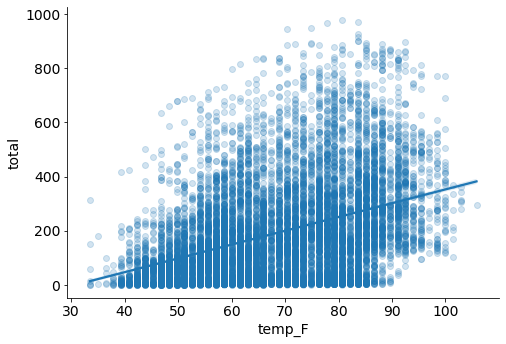

In [16]:
# Ajustamos novamente com Seaborn 
sns.lmplot(x = 'temp_F', 
           y = 'total', 
           data = bikes, 
           aspect = 1.45, 
           scatter_kws = {'alpha':0.2}
          );

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustamos novamente com Seaborn 
sns.lmplot(x = 'temp_F', 
           y = 'total', 
           data = bikes, 
           aspect = 1.45, 
           scatter_kws = {'alpha':0.2}
          );
-->

#### Se repetirmos o processo anterior, de separação de um atributo independente e do atributo target, instanciarmos um modelo, aplicarmos a regressão linear, pelos ajustes, e imprimirmos os coeficientes, teremos:

In [17]:
# criamos novamente X e y

feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# Instanciamos o modelo e fitamos

linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129445
[5.09474471]


####  <span style = "color:red">Código Original.</span>
<!---
# criamos novamente X e y

feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# Instanciamos o modelo e fitamos

linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)
-->

#### Fizermos a conversão de temperatura $T_{Celcius} \rightarrow T_{Fahrenheit}$.

In [18]:
# Convertemos 25°C em °F
temp_C = 25
temp_F = temp_C * 1.8 + 32

####  <span style = "color:red">Código Original.</span>
<!---
# Convertemos 25°C em °F
temp_C = 25
temp_F = temp_C * 1.8 + 32
-->

#### Recalculamos a função $y = a + b X$.

In [19]:
xvalue = temp_F
yvalue = linreg.intercept_ + linreg.coef_* xvalue
print(yvalue)

[235.309725]


####  <span style = "color:red">Código Original.</span>
<!---
xvalue = temp_F
yvalue = linreg.intercept_ + linreg.coef_* xvalue
print(yvalue)
-->

#### E aplicarmos novamente a função `.predict()`, teremos:

In [20]:
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)

array([235.309725])

####  <span style = "color:red">Código Original.</span>
<!---
import numpy as np

test_sklearn = np.array(xvalue).reshape(-1,1)

linreg.predict(test_sklearn)
-->

#### E então, a que conclusão você chegou?

####  <span style = "color:red">Código Original.</span>
<!---
** Conclusão: ** A escala das características é ** irrelevante ** para os modelos de regressão linear. Ao mudarmos a escala, simplesmente alteramos nossa ** interpretação** dos coeficientes.
-->

#### Vamos remover a colunas `'temp_F'` com a função ['.drop()'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). Observe os parãmetros `axis = 1`, `inplace = True`.

In [21]:
# apagamos a coluna temp_F 
bikes.drop('temp_F', 
           axis = 1, 
           inplace = True
          )

####  <span style = "color:red">Código Original.</span>
<!---
# apagamos a coluna temp_F 
bikes.drop('temp_F', 
           axis = 1, 
           inplace = True
          )
-->

## 6. Visualização dos dados 2.

#### Vamos separar alguns atributos particulares, crie uma lista `'feature_cols'` para receber os atributos `'temp'`, `'season'`, `'weather'`, `'humidity'`.

In [22]:
# Exploramos mais features
feature_cols = ['temp', 'season', 'weather', 'humidity']

####  <span style = "color:red">Código Original.</span>
<!---
# Exploramos mais features
feature_cols = ['temp', 'season', 'weather', 'humidity']
-->

#### Vamos usar a função `.pairplot()` para checar a dispersão dos atributos da lista criada e o total de bikes alugadas.

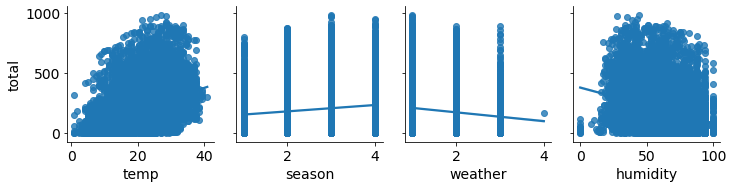

In [23]:
# plots múltiplos em seaborn
sns.pairplot(bikes, 
             x_vars = feature_cols, 
             y_vars = 'total', 
             kind = 'reg'
            );

####  <span style = "color:red">Código Original.</span>
<!---
# plots múltiplos em seaborn
sns.pairplot(bikes, 
             x_vars = feature_cols, 
             y_vars = 'total', 
             kind = 'reg'
            );
-->

#### É possível também realizar o mesmo plot com a função [`.subplots()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) e um loop `for` da lista de atributos criada.

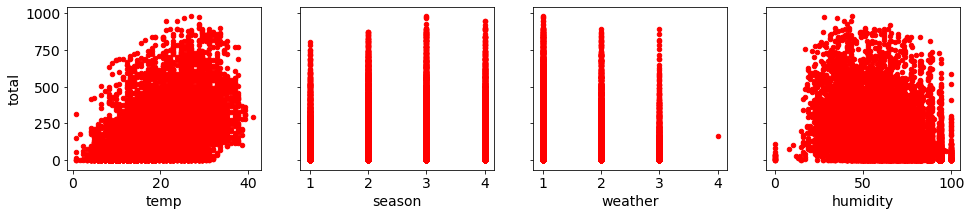

In [24]:
# plots múltiplos em pandas
fig, axs = plt.subplots(1, 
                        len(feature_cols), 
                        sharey = True)

for index, feature in enumerate(feature_cols):
    bikes.plot(kind = 'scatter', 
               x = feature, 
               y = 'total', 
               ax = axs[index], 
               figsize = (16, 3),
               color = 'r'
              )

####  <span style = "color:red">Código Original.</span>
<!---
# plots múltiplos em pandas

fig, axs = plt.subplots(1, 
                        len(feature_cols), 
                        sharey = True)

for index, feature in enumerate(feature_cols):
    bikes.plot(kind = 'scatter', 
               x = feature, 
               y = 'total', 
               ax = axs[index], 
               figsize = (16, 3),
               color = 'r'
              )
-->

### <center>** O que estamos olhando? ** 

In [25]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Vamos usar o método [`.crosstab()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) para criar uma tabela cruzada para as colunas ´'season'´ e `'month'`. Por padrão, essa função calcula uma tabela de frequência dos fatores.

In [26]:
pd.crosstab(bikes['season'], bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


####  <span style = "color:red">Código Original.</span>
<!---
# Criamos uma tabulação cruzada para as variáveis "season" e 'month'.(ou seja, olhamos a quantidade de linhas por estação e por mês)

pd.crosstab(bikes['season'], bikes.index.month)
-->

#### Vamos plotar agora um boxplot com a função [`.boxplot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) para entendermos a distribuição do `'total'` de bikes alugadas ao longo das quatro estações `'season'`.  

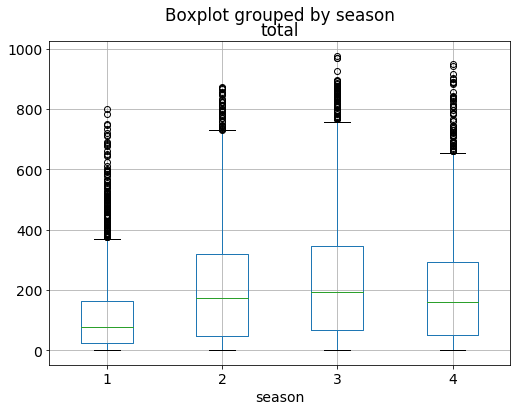

In [27]:
# Fazemos um box plot dos aluguéis agrupados por season
bikes.boxplot(column = 'total', by = 'season');

####  <span style = "color:red">Código Original.</span>
<!---
# Fazemos um box plot dos aluguéis agrupados por season
bikes.boxplot(column = 'total', by = 'season');
-->

__Obs!!:__

- Uma linha não pode capturar um relacionamento não linear.
- Será que tem mais aluguéis no inverno do que na primavera?

#### Vamos estudar a influência das estações no aluguel de bicicletas, para isso vamos plotar o número total alugado com a função `.plot`. 

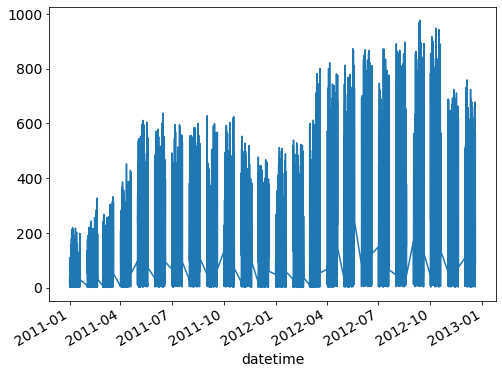

In [28]:
# plots aluguéis em função dos meses
bikes['total'].plot();

####  <span style = "color:red">Código Original.</span>
<!---
# plots aluguéis em função dos meses
bikes['total'].plot();
-->

#### O que isso nos indica?

####  <span style = "color:red">Código Original.</span>
<!---
- Há mais aluguéis no inverno do que na primavera, 
- Mas só porque o sistema está experimentando um ** crescimento geral ** e os meses do inverno chegam depois dos meses da primavera. (?)
-->

#### Vamos estudar a correlação entre os atributos do dataset com uma matriz de correlação.

In [29]:
# matriz de correlação (intervalos de 1 a -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


####  <span style = "color:red">Código Original.</span>
<!---
# matriz de correlação (intervalos de 1 a -1)
bikes.corr()
-->

#### Podemos ainda plotar um mapa de calor com a função [`.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) para termos uma visualização melhor das correlações.

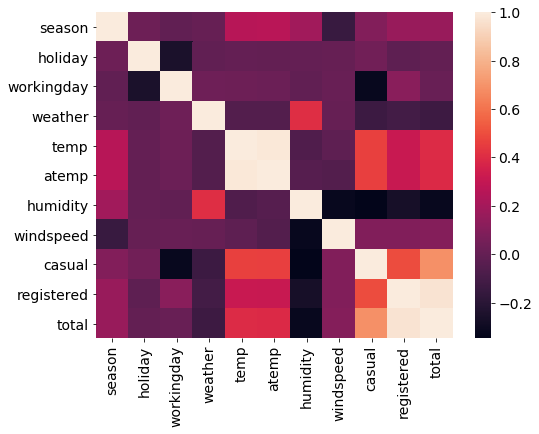

In [30]:
# visualizamos a matriz de correlação em Seaborn usando a heatmap
sns.heatmap(bikes.corr());

####  <span style = "color:red">Código Original.</span>
<!---
# visualizamos a matriz de correlação em Seaborn usando a heatmap
sns.heatmap(bikes.corr());
-->

## <span style = "color:blue">Prática independente</span>


#### Vamos criar um conjunto aleatório de dados e realizar uma regressão linear simples, modelizando os dados.


#### Para gerar os dados aleatórios você vai precisar das seguintes funções e métodos:

- [`np.random.RandomState()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.RandomState.html) e fornecer uma semente para a pseudo-aleatoriedade;
- [`.rand()`](https://numpy.org/devdocs/reference/random/generated/numpy.random.RandomState.rand.html) para retornar valores aleatórios em uma determinada forma;
- [`.randn()`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.randn.html) para retornar uma amostra com distribuição normal.

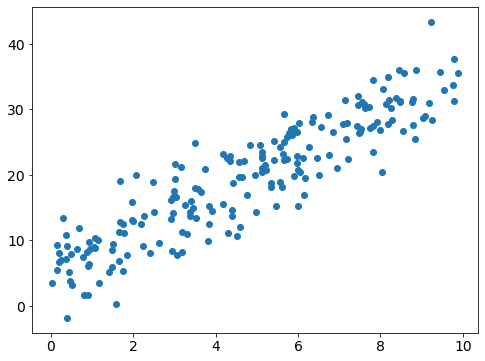

In [31]:
# Fixando a semente da geração de códigoss randômica para a obtenção dos mesmos resultados para todos
rng = np.random.RandomState(10)

# Gerando os valores para x e y
x = 10*rng.rand(200)
y = 3*x  + 5 + 4*rng.randn(200)

# Plotando um gráfico de dispersão
plt.scatter(x, y)
plt.show()

#### Depois disso será necessário que você realize o processo de regressão, aplicando:

- A biblioteca [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- A função [`LinearRegression()`]() para ajustar um modelo linear com coeficientes, lebrando de definir o parâmetro `fit_intercept = True`.
- O método de ajuste [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)
- O [método](https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae) [`np.newaxis`](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis)
- O método [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) para retornar números espaçados uniformemente em um intervalo especificado;
- O método [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) para realizar as previsões do modelo;
- O método [`.scatter()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html) para a dispersão dos pontos;
- E o método [`.plot()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html) para a curva ajustada.

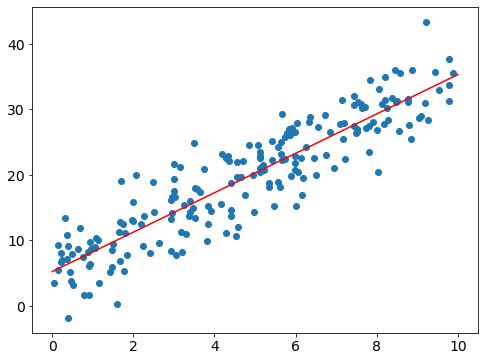

Intercepto beta_0:  5.181982360588229
Inclinação beta_1:  3.0105554108804222


In [32]:
# Importando a biblioteca
from sklearn.linear_model import LinearRegression

# instanciando o modelo
model = LinearRegression(fit_intercept = True)

# Ajustando o modelo
model.fit(x[:, np.newaxis], y)

# Fazendo predições
xfit = np.linspace(0, 10, 200)
yhat = model.predict(xfit[:, np.newaxis])

# Plotando os resultados em uma linha no mesmo gráfico de dispersão dos dados originais
plt.scatter(x, y)
plt.plot(xfit, yhat, color = 'r')
plt.show()

# Imprimindo os resultados - estimadores Beta
print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

#### Uma vez feita a regressão, você terá que calcular os valores do erro médio quadrático ([MSE](https://en.wikipedia.org/wiki/Mean_squared_error#:~:text=In%20statistics%2C%20the%20mean%20squared,values%20and%20the%20actual%20value.)) e sua raíz quadrada ([RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)), o erro absoluto médio [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error)

aplica os seguintes métodos para isso:

- A biblioteca [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) para os cálculos dos erros;
- O método [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) para o cálculo das perdas dos erros;
- O método [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) para o cálculo do erro absoluto médio.

In [40]:
# calculando o MSE em uma célula por SKLEARN
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, yhat)
print(mse)

165.1697948288975


In [43]:
# calcular o RMSE por SKLEARN
np.sqrt(metrics.mean_squared_error(y, yhat))

12.851840133961264

In [44]:
# calculando MAE por SKLEARN
metrics.mean_absolute_error(y, yhat)

10.38249019113676

In [46]:
# MAPE: Mean Absolute Percentage Error

mape = 100 * np.mean(np.abs((y - yhat)/y))
print('mape =',mape,'%')

mape = 148.82296669611407 %


#### Você pode ainda plotar a distribuição dos erros em um histograma.

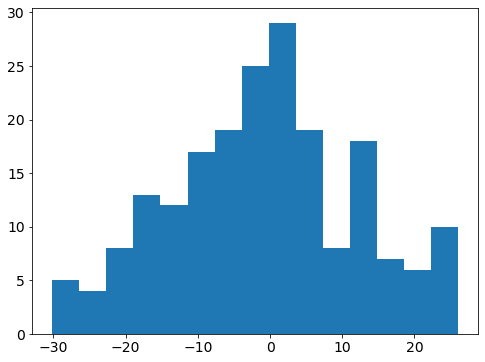

In [48]:
# Plotando a distribuição dos erros em um histograma

plt.hist(y - yhat, bins = 15)
plt.show()

#### E também calcular a média dessa distribuição de erros e a distribuição dos resíduos como função dos índices dos dados gerados como um arranjo numpy [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [49]:
np.mean(y - yhat)

-0.8413173367214273

Text(0.5, 0, 'index')

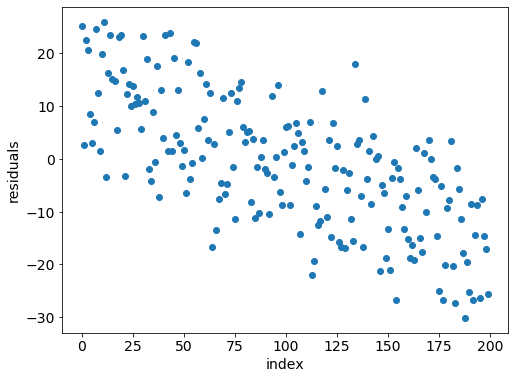

In [50]:
# Plotando a distribuição dos dados pelo respectivo erro em um gráfico de dispersão
plt.scatter(np.arange(x.shape[0]), y - yhat)
plt.ylabel('residuals')
plt.xlabel('index')

### <center> Que relacionamentos são observados?

## 7. Acrescentamento de mais features

#### Vamos agora adicionar mais atributos a nossa regressão linear. Para isso vamos criar uma lista `feature_cols` com os atributos `'temp'`, `'season'`, `'weather'`, `'humidity'`. 

In [226]:
# criamos lista de features
feature_cols = ['temp', 'season', 'weather', 'humidity']

####  <span style = "color:red">Código Original.</span>
<!---
# criamos lista de features
feature_cols = ['temp', 'season', 'weather', 'humidity']
-->

#### Criaremos também o objeto `X` que receberá a lista de atributos `feature_cols` e o objeto `y` para receber o valor total de bikes alugadas.   

In [227]:
# criamos novamente X e y
X = bikes[feature_cols]
y = bikes['total']

####  <span style = "color:red">Código Original.</span>
<!---
# criamos novamente X e y
X = bikes[feature_cols]
y = bikes['total']
-->

#### Aplicamos novamente a função `LinearRegression()` e ajustamos os dados com o método `.fit()`.  

In [228]:
# criamos o modelo e fitamos
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####  <span style = "color:red">Código Original.</span>
<!---
# criamos o modelo e fitamos
linreg = LinearRegression()
linreg.fit(X, y)
-->

#### E imprimimos os coeficientes de inclinação e de interceptação do eixo $y_{x=0}$. 

In [229]:
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

159.52068786129817
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


####  <span style = "color:red">Código Original.</span>
<!---
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)
-->

#### Podemos preparar uma saída mais bem acabada para os coeficientes angulares, associado os objetos `feature_cols` e `linreg.coef_` através da função [`zip()`](https://docs.python.org/3/library/functions.html#zip).  

In [230]:
## para observar melhor, olhamos para o nome com o coeficiente
list(zip(feature_cols, linreg.coef_))

[('temp', 7.864824992477439),
 ('season', 22.53875753246676),
 ('weather', 6.670302035923719),
 ('humidity', -3.118873382396501)]

####  <span style = "color:red">Código Original.</span>
<!---
## para observar melhor, olhamos para o nome com o coeficiente
list(zip(feature_cols, linreg.coef_))
-->

### Como você interpreta os coeficientes angulares acima?

####  <span style = "color:red">Código Original.</span>
<!---
Interpretação dos coeficientes:

- Mantendo fixas todas as outras características, um incremento de 1 unidade ** na temperatura ** é ligado a um ** aumento de aluguéis de 7,86 bicicletas **.
- Mantendo fixas todas as outras características, um incremento de 1 unidade em ** temporada ** é ligado a um ** aumento de aluguéis de 22,5 bicicletas **.
- Mantendo fixas todas as outras categorias, um incremento de 1 unidade em ** tempo ** é ligado a um ** aumento de aluguéis de 6,67 bicicletas **.
- Mantendo fixas todas as outras características, um incremento de 1 unidade em ** umidade ** é ligado a uma ** diminuição de aluguéis de 3,12 bicicletas **.
-->

## 8. Seleção de features

#### Como escolhemos os features a incluir no modelo? Vamos usar os sets de [treinamento/teste](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f).

## 9. Métricas de avaliação para problemas de regressão

#### As métricas de avaliação para problemas de classificação, como ** precisão **, não são úteis para problemas de regressão. Precisamos de métricas de avaliação arquitetadas para comparar ** valores contínuos **. Nas próximas aulas vamos aprofundar o trabalho sobre estas métricas e ver detalhes sobre sua implementação em `python`.

#### Estas são três métricas de avaliação comuns para problemas de regressão:

** O [erro absoluto médio](https://en.wikipedia.org/wiki/Mean_absolute_error) ** (MAE) é a média do valor absoluto dos erros:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

** O [erro quadrático médio](https://en.wikipedia.org/wiki/Mean_squared_error) ** (MSE) é a média dos erros ao quadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

** A [raiz do erro quadrático médio](https://en.wikipedia.org/wiki/Root-mean-square_deviation) ** (RMSE) é a raiz quadrada da média de erros ao quadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$

#### Vamos criar a seguir duas listas, uma com dados reais `[10, 7, 5, 5, 10, 8, 8, 15, 12]` e outra com dados  previstos `[12, 8, 3, 4, 12, 9, 8, 12, 13]` para os mesmos pontos.

In [231]:
# Exemplo de valores de resposta verdadeiros e previstos
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]
pred = [12, 8, 3, 4, 12, 9, 8, 12, 13]

####  <span style = "color:red">Código Original.</span>
<!---
# Exemplo de valores de resposta verdadeiros e previstos
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]
pred = [12, 8, 3, 4, 12, 9, 8, 12, 13]
-->

#### Agora calculamos as valores para `MAE`, `MSE` e `RMSE`. Para isso vamos importar a classe de funções  [´sklearn.metrics´](https://scikit-learn.org/stable/modules/model_evaluation.html) e aplciar os métodos  [`.mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error),  [`.mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) e [`np.sqrt()`](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html), respectivamente. 

#### Vamos também calcular o valor de $R^{2}$, com a ajuda do método [`.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). Essa é uma quantidade estatística que fornece algumas informações sobre a qualidade do ajuste do modelo. Na regressão, o coeficiente de determinação $R^{2}$ é uma medida estatística de quão bem as previsões de regressão se aproximam dos pontos de dados reais. Um $R^{2} = 1$ indica que as previsões de regressão se encaixam perfeitamente nos dados.

In [232]:
# Calculamos métricas manualmente? É claro que não!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))

MAE: 1.4444444444444444
MSE: 2.7777777777777777
RMSE: 1.6666666666666667
R2: 0.7054973821989529


####  <span style = "color:red">Código Original.</span>
<!---
# Calculamos métricas manualmente? É claro que não!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))
-->

#### Comparando estas métricas:

- `MAE` é o mais fácil de entender, porque é o erro médio.
- `MSE` é mais popular que `MAE`, porque `MSE` “penaliza” grandes erros, e isso tende a ser útil no mundo real.
- `RMSE` é ainda mais popular que `MSE`, porque `RMSE` é interpretável nas unidades de `y`.
- `R^2` é a proporção da variância total de $Y$ explicada pelo modelo.

#### Todas elas são ** funções de perda **, porque nós queremos minimizá-las.

#### Exemplo adicional, para conferir como `MSE` / `RMSE` penalizam mais os maiores erros:

In [233]:
# com os mesmos valores de antes para true
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]

# novo set de valores para a previsão
pred = [12, 8, 3, 4, 12, 9, 8, 22, 13]

# MAE aumenta um pouco
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE e RMSE são maiores do que antes. Por sua vez, R2 piora seu desempenho.
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))

MAE: 1.8888888888888888
MSE: 7.222222222222222
RMSE: 2.6874192494328497
R2: 0.23429319371727741


## 10. Comparação de modelos usando sets de treinamento/teste e RMSE

#### Podemos também realizar testes de precição em nosso modelo. Para isso vamos importar a classe de funções [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### Para agilizar o processo, podemos definir uma função particular `train_test_rmse()` que receba o objeto `feature_cols` com os atributos escolhidos, os objetos `X` e `y` para receber a lista de atributos e o targe de nosso modelo. Fazendo uso da função [´train_test_split()´](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) podemos subdivir nosso dataset entre os objetos `X_train`, `X_test`, `y_train` e `y_test` para o processo de treino/teste de nosso modelo. Você pode entender melhor o processo de embaralhamento dos dados estudando o parâmetro [`random_state`](https://scikit-learn.org/stable/glossary.html#term-random-state).

#### Por fim, a função que definimos pode instanciar uma regressão com o objeto `linreg` e a função [`LinearRegression()`](), ajustar os pontos aos subconjuntos de treino `X_train` e `y_train`, usando o método `.fit()`, predizer valores de target com o método  `.predict()` e retornar o `RMSE` calculado.  

In [234]:
from sklearn.model_selection import train_test_split

# Definimos uma função que aceita uma lista de features e retorna a prova RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        random_state = 123
                                                       )
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import train_test_split

# Definimos uma função que aceita uma lista de features e retorna a prova RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        random_state = 123
                                                       )
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
-->

#### A seguir podemos imprimir as saídas de `train_test_rmse()` para resultados de coleções diversas de atributos modelados. Vamos testar nosso modelo para as seguintes combinações de `feature_cols`: 

- ['temp', 'season', 'weather', 'humidity']
- ['temp', 'season', 'weather']
- ['temp', 'season', 'humidity']

In [235]:
# comparamos diferentes ensamblagens de features
print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))

155.64945913079674
164.1653997629182
155.59818936691417


####  <span style = "color:red">Código Original.</span>
<!---
# comparamos diferentes ensamblagens de features
print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))
-->

#### É importante entender os atributos que compõem o dataset e excluir da modelização atributos que não geram impacto no entendimento dos fenômenos. Poderíamos testar nossa função modelizadora com os atributos `'casual'` e `'registered'`. 

#### A quantidade total de bicicletas emprestadas é definida como a adição de bicicletas emprestadas a usuários casuais e registrados. Não faz sentido nenhum fazer um modelo disso e é por esse relacionamento tão direto que as métricas de erro são baixíssimas.

#### Tente rodar nossa função de modelização para essas quantidades.

In [236]:
print (train_test_rmse(['casual', 'registered']))

6.465079976076669e-14


####  <span style = "color:red">Código Original.</span>
<!---
print (train_test_rmse(['casual', 'registered']))
-->

#### Usando o método [`np.all()`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) podemos testar se todos os elementos do dataset respeitam a relação que discutimos na célula anterior.

In [237]:
# Conferimos que as colunas sejam perfeitamente dependentes.
np.all(bikes['casual'] + bikes['registered'] == bikes['total'])

True

####  <span style = "color:red">Código Original.</span>
<!---
# Conferimos que as colunas sejam perfeitamente dependentes.
np.all(bikes['casual'] + bikes['registered'] == bikes['total'])
-->

### 10.1 Comparar RMSE de com RMSE nulo (baseline)

#### Podemos estudar o `RMSE` fazendo a comparação de um subconjunto de teste e um arranjo com valores médios do conjunto de teste. 

#### Para isso vamos usar a função `train_test_split()` para subdividir nosso dataset e o método [`np.zeros_like()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) para retornar um arranjo de zeros com a mesma forma e tipo que o arranjo especificado.

#### Por fim vamos preencher os valores com a média do conjunto de teste, usando o método [`np.fill()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.fill.html).

In [238]:
# Definimos X e y para os sets de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 123
                                                   )

# criamos um array numpy com a mesma forma que y_test

y_null = np.zeros_like(y_test, 
                       dtype = float
                      )

# preenchemos o array com o valor médio de y_test

y_null.fill(y_test.mean())
print(y_null)

[192.26451139 192.26451139 192.26451139 ... 192.26451139 192.26451139
 192.26451139]


####  <span style = "color:red">Código Original.</span>
<!---
# Definimos X e y para os sets de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 123
                                                   )

# criamos um array numpy com a mesma forma que y_test

y_null = np.zeros_like(y_test, 
                       dtype = float
                      )

# preenchemos o array com o valor médio de y_test

y_null.fill(y_test.mean())
print(y_null)
-->

#### Calculamos agora o valor de `RMSE` para os valores do subconjunto de teste  e o baseline de valores médios do subconjunto de teste.

In [239]:
# calculamos RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727

####  <span style = "color:red">Código Original.</span>
<!---
# calculamos RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))
-->

## 11. Gestão de características categóricas

#### A biblioteca `Scikit-learn` espera que todas as funções sejam numéricas. Então, como incluir uma característica categórica no nosso modelo?

#### Categorias ordenadas: Transformar em valores numéricos sensíveis, por exemplo: 

- pequeno = 1; 
- médio = 2; 
- grande = 3. 


####  Categorias não ordenadas: Utilizar codificação fictícia:

- (0/1) (Variáveis dummies).

#### Quais as características categóricas do nosso conjunto de dados?

- Categorias ordenadas: weather (já codificado com valores numéricos sensíveis)
- Categorias não ordenadas: season (precisa de variáveis dummy), holiday (já está codificada como dummy), workingday (já está codificada como dummy)


#### Para a temporada, não podemos deixar só a codificação como `1 = primavera`, `2 = verão`, `3 = outono` e `4 = inverno`, porque isso sinalizaria um relacionamento ordenado. Em vez disso, criamos  variáveis dummies múltiplas.

#### Aplique os métodos [`.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) para converter as variáveis categóricas de `season` em variáveis dummy / indicador. 

#### Observe o parâmetro `prefix = 'season'` para manter os valores numéricos das estações como headers.

#### Depois disso aplique o método [`.sample()` ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) para separar uma amostra aleatória de observações. O parâmetro `n` trás o número de itens na amostral e `random_state = 1` define uma semente para o gerador de números aleatórios. 

In [240]:
# criar variáveis dummies
season_dummies = pd.get_dummies(bikes['season'], 
                                prefix = 'season'
                               )

# imprimimos para ver 5 linhas quaisquer
season_dummies.sample(n = 5, 
                      random_state = 1
                     )

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


####  <span style = "color:red">Código Original.</span>
<!---
# criar variáveis dummies
season_dummies = pd.get_dummies(bikes['season'], 
                                prefix = 'season'
                               )

# imprimimos para ver 5 linhas quaisquer
season_dummies.sample(n = 5, 
                      random_state = 1
                     )
-->

#### Contudo, já vimos que na verdade só precisamos de  três variáveis dummies, não quatro. Portanto vamos eliminar a primeira variável dummy. Para isso usamos o método [`.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), atentando apara os parâmetros `axis = 1`,`inplace = True`.

#### Depois podemos gerar uma nova amostra.

In [241]:
# Pulamos a primeira coluna
season_dummies.drop(season_dummies.columns[0], 
                    axis = 1, 
                    inplace = True
                   )

# imprimimos 5 linhas quaisquer
season_dummies.sample(n=5, 
                      random_state = 1
                     )

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


####  <span style = "color:red">Código Original.</span>
<!---
# Pulamos a primeira coluna
season_dummies.drop(season_dummies.columns[0], 
                    axis = 1, 
                    inplace = True
                   )

# imprimimos 5 linhas quaisquer
season_dummies.sample(n=5, 
                      random_state = 1
                     )
-->

#### No geral, se houver uma feature categórica com `k` valores possíveis, é preciso criar `k-1` variáveis fictícias.

#### Agora vamos concatenar os dataframes `bikes` e `season_dummies`, usando o método [`.concat()` ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat) ao longo do eixo `1`. 

#### E depois geramos mais uma amostra de cinco observações.

In [242]:
# Concatenar o DataFrame original e o dummy DataFrame (axis = 0 significa linhas, axis = 1 significa colunas)
bikes = pd.concat([bikes,season_dummies], 
                  axis = 1
                 )

# imprimimos 5 linhas quaisquer
bikes.sample(n = 5, 
             random_state = 1
            )

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


####  <span style = "color:red">Código Original.</span>
<!---
# Concatenar o DataFrame original e o dummy DataFrame (axis = 0 significa linhas, axis = 1 significa colunas)
bikes = pd.concat([bikes,season_dummies], 
                  axis = 1
                 )

# imprimimos 5 linhas quaisquer
bikes.sample(n = 5, 
             random_state = 1
            )
-->

#### Vamos então incrementar nosso modelo, como esses novos atributos. Separar lista de atributos, criar os objetos que recebem esses atributos e o nosso target, instanciar um modelo de regressão linear, ajustar os pontos e unir a lista de atributos àquela de coeficientes de inclinação.

In [243]:
# Incluímos variáveis dummies
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575784),
 ('season_2', -3.3905430997179598),
 ('season_3', -41.73686071317068),
 ('season_4', 64.41596146824214),
 ('humidity', -2.819481636259646)]

####  <span style = "color:red">Código Original.</span>
<!---
# Incluímos variáveis dummies
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))
-->

#### Como interpretamos os coeficientes de season? Eles são medidos conforme a linha de base `'spring'`:

- Mantendo fixas todas as outras características, `summer` é ligado a um decréscimo de aluguéis de 3,39 bicicletas em comparação com spring.
- Mantendo fixas todas as outras características, `fall` é ligado a um decréscimo de aluguéis de 41,7 bicicletas em comparação com spring.
- Mantendo fixas todas as outras características, `winter` é ligado a um decréscimo de aluguéis de 64,4 bicicletas em comparação com spring.

#### O que acontece se mudarmos a dummy definida como a linha de base? Os efeitos mudariam?

- Não, simplesmente mudaria a nossa ** interpretação** dos coeficientes.

#### Importante: A codificação por dummies é relevante para todos os modelos de aprendizagem automática, não apenas para os modelos de regressão linear.

#### Para terminar, vamos submeter as listas de atributos `['temp', 'season', 'humidity']` e  
`['temp', 'season_2', 'season_3', 'season_4', 'humidity']` à função `train_test_rmse()` que definimos 
anteriormente, e comparar os resultados para os `RSME`. 

In [244]:
# comparar modelo com a feature season a modelo com variáveis dummy.
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

155.59818936691417
154.33394593635998


####  <span style = "color:red">Código Original.</span>
<!---
# comparar modelo com a feature season a modelo com variáveis dummy.
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))
-->

#### O que você vê?

####  <span style = "color:blue">Código Original.</span>
<!---
[``]()
-->